[[9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j ... 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j]
 [9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j ... 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j]
 [9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j ... 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j]
 ...
 [9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j ... 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j]
 [9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j ... 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j]
 [9.89749454+2.92734587e-18j 9.89749454+2.92734587e-18j
  9.89749454+2.92734587e-18j ... 9.89749454+2.92734587e-18j
  9.89749454+2

C:\Users\yupengw\AppData\Local\Temp\ipykernel_1788\2152071335.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  risk_simulation[j] = risk


[[37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j ... 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j]
 [37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j ... 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j]
 [37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j ... 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j]
 ...
 [37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j ... 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j]
 [37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j ... 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j]
 [37.12738205-4.77048956e-18j 37.12738205-4.77048956e-18j
  37.12738205-4.77048956e-18j ... 37.12738

TypeError: show() got an unexpected keyword argument 'legend'

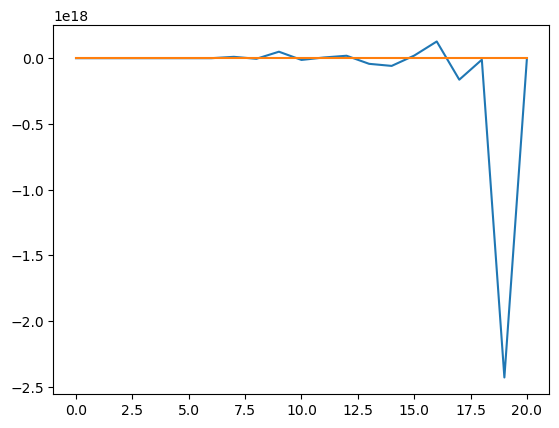

In [34]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import statsmodels.api as sm


np.random.seed(1) # Fix a seed for reproduction.

risk_simulation = np.zeros(21)
risk_limit = np.zeros(21)

n = 300
for j in range(20):
    p = 100 + 30 * j
    gamma = p / n
    
    beta = np.ones(p)
    x = np.random.normal(size=(n,p))
    eps = np.random.normal(size=(n,1))
    y = x * beta + eps
    
    if n >= p:
        risk_limit[j] = gamma / (1 - gamma)
        
        bias = 0
        variance = np.linalg. inv(np.matmul(np.transpose(x), x))
        
        risk = bias + np.trace(variance)
        risk_simulation[j] = risk
    else:
        risk_limit[j] = np.dot(beta,beta) * (gamma - 1) / gamma + 1 / (gamma - 1)
        
        value, vector = np.linalg.eig(np.matmul(np.transpose(x), x))
        
        general_inv = np.zeros((p,p))
        for t in range(n):
            general_inv = general_inv + (1 / value[p-1-t]) * np.matmul(vector[p-1-t],vector[p-1-t])
        
        PI = np.zeros((p,p))
        for t in range(n,p):
            PI = PI + np.matmul(vector[p-1-t],vector[p-1-t])
        
        bias = np.matmul(beta, np.matmul(PI, beta))
        risk = bias + np.trace(general_inv)
        risk_simulation[j] = risk

import matplotlib.pyplot as plt
print(risk_limit,risk_simulation)
plt.plot(risk_simulation, label='simulation')
plt.plot(risk_limit,label='limit')
plt.show(legend=True)